1. Завантажте датасет transaction_data.csv(https://drive.google.com/file/d/1D8K8954lqenAgp8wlq1Pew6ITZ7RX2QS/view?usp=sharing). 
Перевірте розмір таблиці, типи змінних, кількість пропущених значень та описову статистику.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://drive.google.com/file/d/1D8K8954lqenAgp8wlq1Pew6ITZ7RX2QS/view?usp=sharing'
path = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
transaction_data = pd.read_csv(path, parse_dates=['date'])

In [3]:
transaction_data.shape


(5315, 3)

In [4]:
# transaction_data.drop_duplicates().shape
# видалення дубльованих рядків у ДС та перевірка скільки залишилося рядків та стовпців

In [5]:
transaction_data.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

In [6]:
transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [7]:
transaction_data.describe()

C:\Users\m.semchenko\AppData\Local\Temp\ipykernel_12348\3961127521.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaction_data.describe()


,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692
first,2020-03-02 00:00:00,NaN,NaN
last,2020-03-02 01:29:05,NaN,NaN


In [8]:
transaction_data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


2. Які значення перебувають у колонці transaction?
Скільки спостережень відносяться до того чи іншого рівня?
Візуалізуйте результат за допомогою барплоту.

In [9]:
transaction_data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [10]:
transaction_data.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

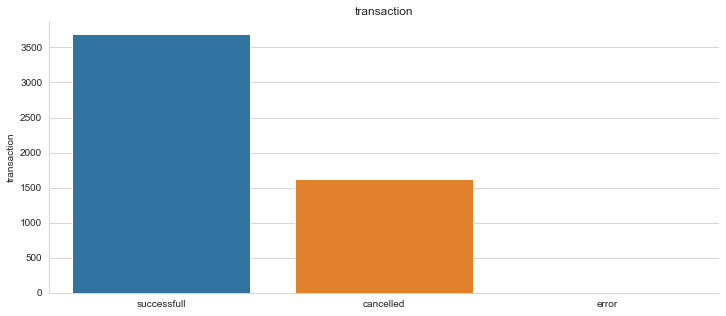

In [11]:
plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')
# стиль графіка darkgrid, whitegrid, dark, white і ticks.
sns.barplot(x=transaction_data.transaction.value_counts().index \
           ,y=transaction_data.transaction.value_counts()
           )
plt.title('transaction')
sns.despine()

3. Скільки транзакцій завершились помилкою?

In [12]:
transaction_data.query('transaction == "cancelled"').transaction.value_counts()

cancelled    1619
Name: transaction, dtype: int64

4. Скільки успішних транзакцій здійснив кожен із користувачів? Збудуйте гістограму розподілу числа успішних транзакцій.

In [13]:
transaction_by_user = transaction_data \
                    .query('transaction == "successfull"') \
                    .groupby('name') \
                    .agg({'transaction': 'count'}) \
                    .rename(columns={'transaction': 'successfull'})

C:\Users\m.semchenko\AppData\Local\Temp\ipykernel_12348\2456056703.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction_by_user ,kde=False)


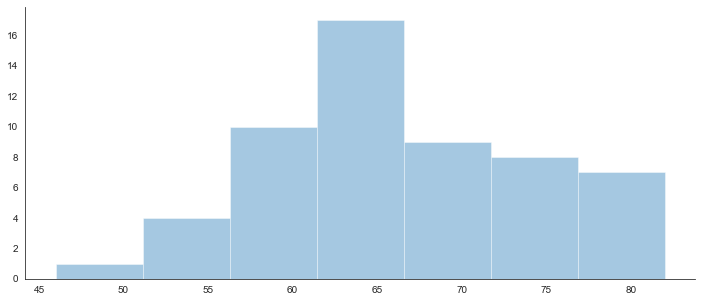

In [14]:
plt.figure(figsize=(12, 5))
sns.set_style('white')
sns.distplot(transaction_by_user ,kde=False)
sns.despine()

In [15]:
transaction_by_user.describe()

,successfull
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


5. Колега надіслав Вам оновлені дані transaction_data_updated.csv (https://drive.google.com/file/d/14vG-5Qe50Ps5I_jp97TgLmvlW--KIrWi/view?usp=sharing).
Побудуйте зведену таблицю user_vs_minute_pivot, де як стовпці будуть використані імена користувачів, рядків – хвилини, значень – кількість скоєних операцій у вказану хвилину. Пропущені значення заповніть нулями.

In [16]:
url_updated = 'https://drive.google.com/file/d/14vG-5Qe50Ps5I_jp97TgLmvlW--KIrWi/view?usp=sharing'
path_updated = 'https://drive.google.com/uc?id=' + url_updated.split('/')[-2]
transaction_data_updated = pd.read_csv(path_updated, parse_dates=['date'])

In [17]:
transaction_data_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [18]:
transaction_data_updated.isna().sum()

date           0
name           0
transaction    0
minute         0
dtype: int64

In [19]:
user_vs_minute_pivot = transaction_data_updated.pivot_table(index='minute'
                                                        ,columns='name'
                                                        ,values='transaction'
                                                        ,aggfunc='count'
                                                        ,fill_value=0
                                                        )

In [20]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3,4,2,3,4,4,2,1,2,2,...,0,3,1,1,4,1,3,0,0,1
1,4,4,0,4,2,5,4,4,4,3,...,4,5,3,2,3,3,0,0,3,2
2,1,2,4,4,2,1,3,2,3,3,...,4,1,3,3,0,1,2,1,3,1
3,3,0,2,0,5,2,1,3,2,2,...,1,5,5,2,4,0,3,4,1,0
4,3,0,0,3,1,1,2,3,2,1,...,1,2,2,1,1,2,2,3,0,1


In [21]:
# Спосіб 2

In [22]:
transaction_number_2 = transaction_data_updated.groupby(['name','minute'], as_index=False) \
                                                    .agg({'transaction': 'count'}) \
                                                    .rename(columns={'transaction': 'number'})

In [23]:
transaction_number_2.head()

,name,minute,number
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [24]:
user_vs_minute_pivot_2 = transaction_number_2.pivot(index='minute'
                                                ,columns='name'
                                                ,values='number'
                                                )

In [25]:
user_vs_minute_pivot_2.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [26]:
# замінюємо NaN на 0
user_vs_minute_pivot_2.fillna(0, inplace=True)

In [27]:
user_vs_minute_pivot_2.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [28]:
# не рівні по причині різних типів даних
# порівняння ДФ
user_vs_minute_pivot.equals(user_vs_minute_pivot_2)

False

In [29]:
user_vs_minute_pivot == user_vs_minute_pivot_2

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


6. Вивчіть поданий графік. Допоможіть колезі розібратися, чи є в даних помилка, чи все добре.

<AxesSubplot: xlabel='minute'>

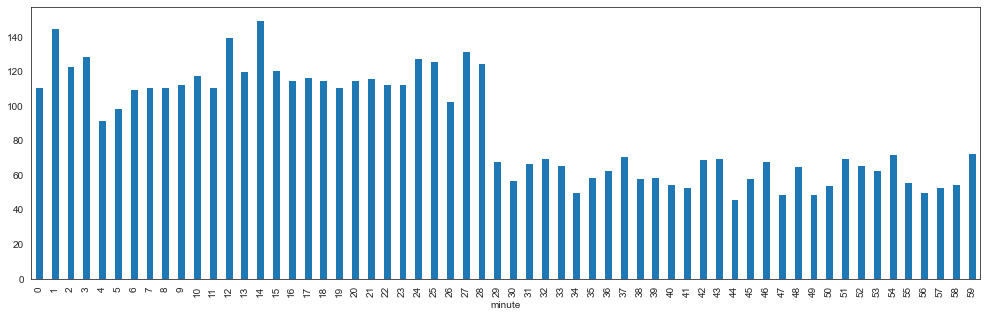

In [30]:
user_vs_minute_pivot.sum(axis=1).plot.bar(figsize=(17,5))
# axis=0 сума по стовпцю
# axis=1 сума за рядком



7. Якщо в даних закралася помилка, виправте її та збережіть правильне число хвилин, що минули з початку дня, у колонку true_minute.

In [31]:
transaction_data_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [32]:
transaction_data_updated['date'] = pd.to_datetime(transaction_data_updated.date)

In [33]:
transaction_data_updated['true_minute'] = transaction_data_updated.date.dt.minute + transaction_data_updated.date.dt.hour * 60

<AxesSubplot: xlabel='true_minute', ylabel='count'>

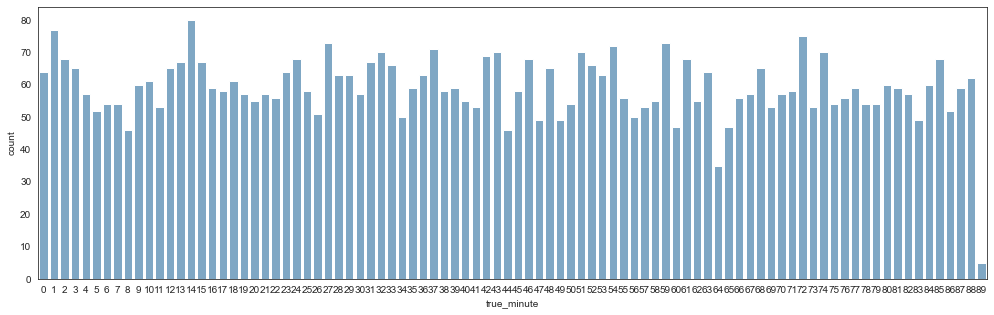

In [34]:
plt.figure(figsize=(17, 5))
sns.countplot(data=transaction_data_updated
              ,x='true_minute'
              ,color='#74a9cf')
